In [5]:
import pandas as pd
import numpy as np
import json
#import re
#import string
import nltk
from PIL import Image
import spacy

nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fabiofistarol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fabiofistarol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
data = open('beatles.txt').read()
# data

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import random

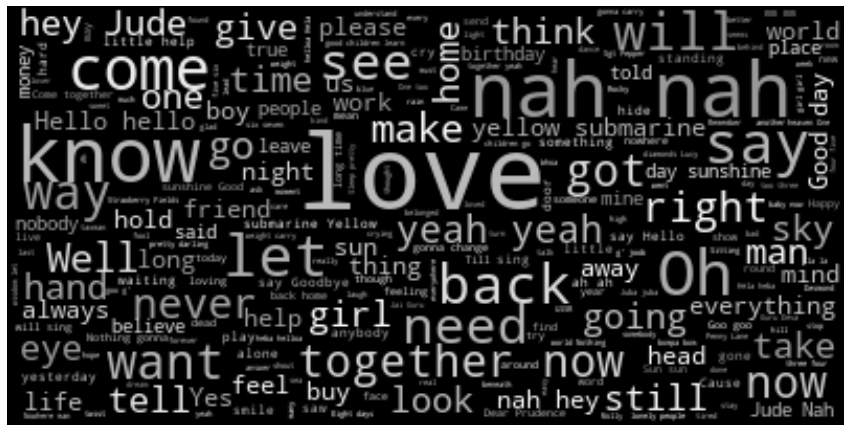

In [50]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

input_text = data

plt.rcParams['figure.figsize']=(15,10)  # set default size of plots
plt.rcParams['font.size']=12                # set default font size
plt.rcParams['savefig.dpi']=100             # set default save figure resolution
plt.rcParams['figure.subplot.bottom']=.1    # set subplot bottom
# Create stop words list
stop_words = set(STOPWORDS) 
stop_words.update(['','']) # if you want to add a word to the stop words list


# Generate a word cloud image
wordcloud = WordCloud(
                        stopwords=stop_words, # set of words to ignore
                        background_color='black', # set background color
                        max_words=500, # max number of words
                        max_font_size=50, # max font size of the words
).generate(input_text)

# Display the generated image:
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

In [51]:
try_unigram = data.split()

In [52]:
# try_unigram

In [59]:
# use transcript_text_df.text to get the top words
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(try_unigram, 20)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])   

# unigram


# stop_words.update(['','']) # if you want to add a word to the stop words list

In [69]:
prettier_data

Yesterday, all my troubles seemed so far away
Now it looks as though they're here to stay
Oh, I believe in yesterday Suddenly, I'm not half the man I used to be
There's a shadow hanging over me.
Oh, yesterday came suddenly Why she had to go I don't know she wouldn't say
I said something wrong, now I long for yesterday Yesterday, love was such an easy game to play
Now I need a place to hide away
Oh, I believe in yesterday Why she had to go I don't know she wouldn't say
I said something wrong, now I long for yesterday Yesterday, love was such an easy game to play
Now I need a place to hide away
Oh, I believe in yesterday
Mm mm mm mm mm mm mm When I find myself in times of trouble, Mother Mary comes to me
Speaking words of wisdom, let it be
And in my hour of darkness she is standing right in front of me
Speaking words of wisdom, let it be
Let it be, let it be, let it be, let it be
Whisper words of wisdom, let it be And when the broken hearted people living in the world agree
There will be

In [67]:
# less than 3 letters

# text = " ".join(i for i in transcript_text_df.text)
# text_split = text.split()
# text_3_letters = []
# for i in text_split:
#     if len(i) > 3:
#         text_3_letters.append(i)
# text_3_letters = " ".join(i for i in text_3_letters)

In [68]:
prettier_data = nlp(data)

In [70]:
trigram_sentences = [sent for sent in prettier_data.sents]

In [44]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(trigram_sentences, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram

AttributeError: 'spacy.tokens.span.Span' object has no attribute 'lower'